In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
## importing some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
## read csv
dataset=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [11]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
## observing the dataset, its a binary classification - we can predict if any customer will exit or not
## exited - output feature = dependent feature
## creditScore, geography, gender, age, tenure, balance, no of products, has card, is Active, EstimatedSalary - input or independent features

In [ ]:
## Prepare input data X and output data y

In [13]:
## X = keeping all rows but not column - 0, 1,2,
## y = keeping all rows but only 13th column

X=dataset.iloc[:, 3:13]
y=dataset.iloc[:,13]

In [14]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
## We also have 2 categorical features Geography and Gender, so using One Hot Encoding- we see a split amoung 3 countries

pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [17]:
## since we can handle 3 variables by dropping one column of above table so

pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [18]:
## Assigning above values to a brand new column and using OHE for gender with drop first

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [20]:
## drop original columns from dataset
X=X.drop(['Geography','Gender'],axis=1)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
## Concatenate the new columns - geography and gender
X=pd.concat([X,geography,gender],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [24]:
## train- test- split
## splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
X_train.shape

(8000, 11)

In [ ]:
## shape of input train data = X_train = 8000 * 11
## ie 11 - columns
## 8000 = number of rows

In [29]:
## Creating ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
### sequential - helps us in taking whole Neural Network at once, covering all forward and backward propogation
### Dense - layers of NN - hidden layer and output layers
### Leaky Relu, RELu, ELU, prelu- are activation functions
### Dropout layer - to reduce/avoid over fitting

In [30]:
## Initialise ANN
classifier=Sequential()

In [31]:
## Adding the input layer with unit=11  as input features =11
classifier.add(Dense(units=11,activation='relu'))

In [32]:
## Adding first hidden layer , random number of unit=7
classifier.add(Dense(units=7,activation='relu'))

In [33]:
## Adding second hidden layer , random number of unit=7
classifier.add(Dense(units=6,activation='relu'))

In [34]:
## Adding output layer ,  number of unit=1 as it is binary classification using sigmoid function at output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [35]:
## Train ANN- using adam optimizer , and binary cross entropy loss function, to find accuracy
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
## to apply learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [37]:
## using this object opt in place of optimizer value
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
## Train ANN - will take some time for computation

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 7s 4ms/step - loss: 0.4196 - accuracy: 0.8108 - val_loss: 0.3806 - val_accuracy: 0.8413
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8559 - val_loss: 0.3696 - val_accuracy: 0.8459
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3556 - accuracy: 0.8552 - val_loss: 0.3612 - val_accuracy: 0.8444
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3492 - accuracy: 0.8578 - val_loss: 0.3690 - val_accuracy: 0.8432
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3467 - accuracy: 0.8572 - val_loss: 0.3732 - val_accuracy: 0.8444
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8586 - val_loss: 0.3645 - val_accuracy: 0.8474
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3453 - accuracy: 0.8567 - val_loss: 0.3571 - val_accuracy: 0.8519

In [ ]:
## we see accuracy increases ; loss decreases ; but after some epochs - accuracy is repeating so

## Using Early stopping


In [40]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [41]:
## declare model history with early stopping
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3163 - accuracy: 0.8705 - val_loss: 0.3762 - val_accuracy: 0.8523
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3134 - accuracy: 0.8712 - val_loss: 0.3965 - val_accuracy: 0.8466
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3160 - accuracy: 0.8707 - val_loss: 0.3990 - val_accuracy: 0.8542
Epoch 4/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3146 - accuracy: 0.8739 - val_loss: 0.3908 - val_accuracy: 0.8497
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3180 - accuracy: 0.8696 - val_loss: 0.4137 - val_accuracy: 0.8508
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3164 - accuracy: 0.8716 - val_loss: 0.3726 - val_accuracy: 0.8554
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3160 - accuracy: 0.8684 - val_loss: 0.3930 - val_accuracy: 0.8519

In [42]:
## fetch keys from model history

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

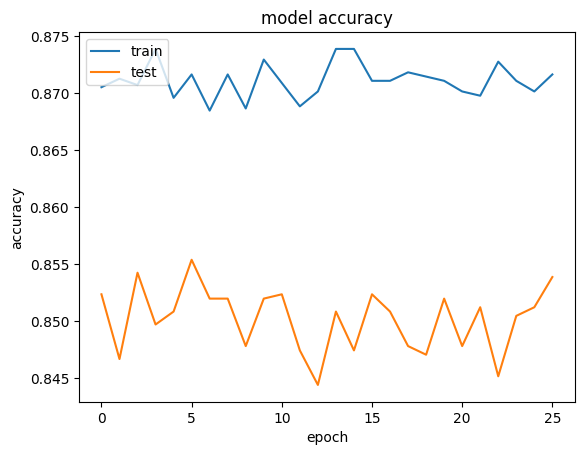

In [45]:
## plotting accuracy and val_accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

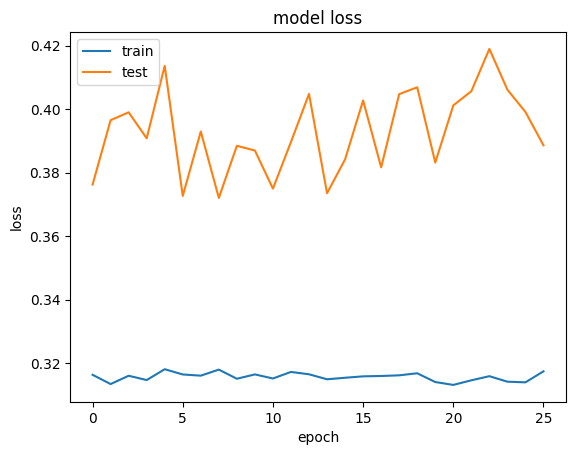

In [46]:
## plotting loss and val_loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [47]:
## Making predictions
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [48]:
## Make confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1517,   78],
       [ 213,  192]])

In [49]:
## accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [50]:
score

0.8545

In [51]:
## get the weights initialised in NN

classifier.get_weights()

[array([[-1.1524304 , -0.4928631 ,  3.9001832 , -1.1022907 ,  0.45798808,
         -0.97136045, -0.7265378 , -1.0408922 , -0.04927961, -1.6375206 ,
          0.8336389 ],
        [ 3.6423182 , -0.8033798 , -2.7307816 , -0.18288851, -2.2652037 ,
          0.12422168,  2.65009   , -3.1872122 ,  4.0199513 , -2.8114023 ,
         -3.909036  ],
        [-0.38651815, -0.03211294, -0.05611884,  1.1914079 , -2.4134877 ,
          0.6658514 , -0.34483308,  0.41953406, -0.8521238 ,  0.93460965,
         -0.36140764],
        [-2.1874845 ,  0.8007793 , -3.7354507 , -0.3604387 ,  2.217624  ,
         -4.9712687 ,  0.11844839, -0.7606367 , -3.0609424 , -3.5525014 ,
         -3.2749186 ],
        [-5.0223007 ,  4.8177643 , -1.6860489 , -1.9345298 , -1.4679911 ,
         -4.504825  ,  4.1957965 ,  2.4832907 , -0.297689  , -0.5439364 ,
         -3.6494033 ],
        [ 0.28224063,  0.444427  ,  0.6341669 ,  0.71039295,  0.43670025,
         -0.2685579 , -0.58359087, -0.8615017 ,  0.26400912,  0.6829004

In [ ]:
## to add drop out layer after dense layer - commenting ; accuracy after drop out will increase

## classifier.add(Dense(units=11,activation='relu'))
## classifier.add(Dropout(0.3))